# Applied Machine Learning HomeWork 1
Due 09/29/21 11:59pm

## Task 1: Data Visualization and Analysis

You can download the FIFA 19 complete dataset from

https://www.kaggle.com/karangadiya/fifa19

Please replace the value of PATH_TO_DATASET variable in the following block with the path to your dataset

In [1]:
# import modules, read data
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## TODO: Replace with the path to your dataset
PATH_TO_DATASET = '/Users/Ivan/AppliedMachineLearning/data.csv' 
############################################################

df = pd.read_csv(PATH_TO_DATASET)
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### 1.1 

Create a **scatter plot** of the Age vs Overall Rating. **Ensure the axes are labeled
properly.**

Text(0.5, 1.0, 'Scatterplot of Overall Rating vs Age')

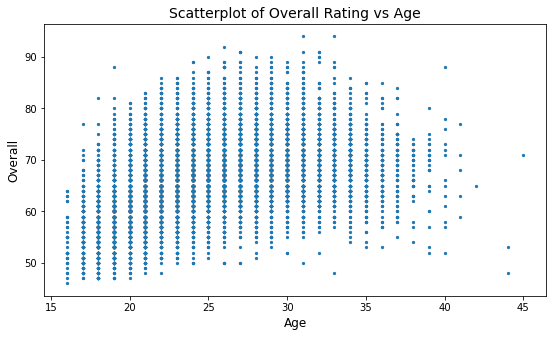

In [2]:
#YOUR CODE HERE
plt.figure(figsize=(9, 5))
plt.scatter(df["Age"],df["Overall"], s = 5)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Overall', fontsize=12)
plt.title('Scatterplot of Overall Rating vs Age', fontsize=14)

###1.2

Visualize the distribution of Overall Rating as a **histogram**. 

Do a small multiples plot of whether the player's prefered foot is left, i.e. do **one plot** of Overall Rating distribution for those players prefered left foot and **a separate** for those who prefer right foot (**within the same figure on separate axes**). **Ensure the axes are labeled properly and titles are added.**

Text(0.5, 0.98, 'Histogram of Overall Rating by Preferred foot')

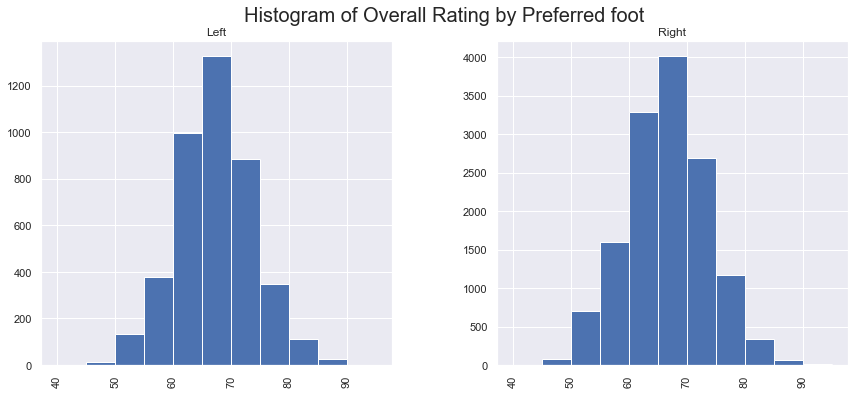

In [47]:
#YOUR CODE HERE
import pylab as pl
df_left = df[df['Preferred Foot'] == 'Left']
df_right = df[df['Preferred Foot'] == 'Right']

colors = ['#E69F00', '#56B4E9']
names = ['Left Foot', 'Right Foot']


df["Overall"].hist(by = df["Preferred Foot"],figsize=(14, 6),bins=np.arange(40,100,5))
pl.suptitle('Histogram of Overall Rating by Preferred foot',fontsize=20)


Can you spot differences in the distributions?

Answer: From the above, it seems that more players prefer to use right foot rather than left foot. However, the overall rating for either foot seems to be distributed similarly.

### 1.3

Create a **pie chart** for distribution of Weak Foot for all the players. Get rid of players whose Weak Foot = nan. **Ensure each division is labeled properly and title is added**

Text(0.5, 1.0, 'Distribution of Weak Foot in Pie Chart')

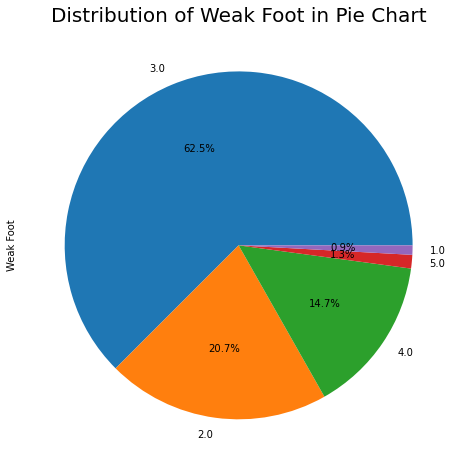

In [44]:
#YOUR CODE HERE
df2 = df.dropna(subset=['Weak Foot']) ## Get rid of NANs

plt.figure(figsize=(8, 8))
df2['Weak Foot'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Weak Foot in Pie Chart',fontsize=20)

### 1.4 

Create **a boxplot and a violin plot** for distributions of players' ages in different positions (similar to plots on page 92 of Lecture 1 slide) Get rid of players whose position = nan. **Ensure the axes are labeled properly**

Text(0.5, 1.0, "Boxplot of Players' Age by Position ")

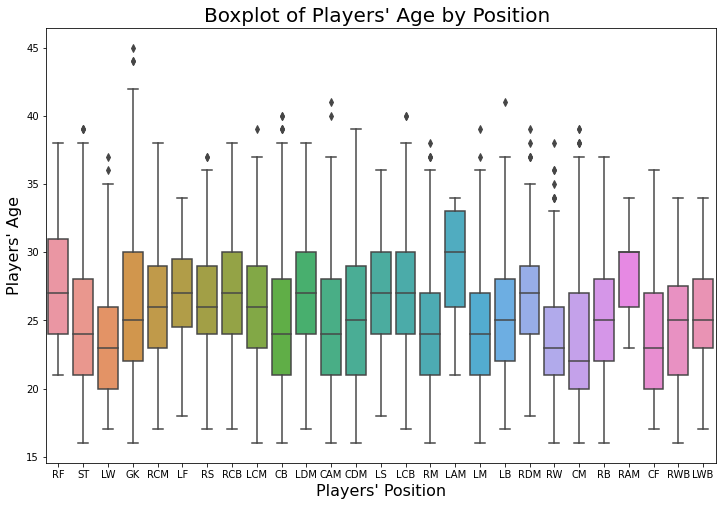

In [55]:
# Your Code Here
df3 = df.dropna(subset=['Position'])## Get rid of nan values
df3['Position'].unique()## Check if the nan vlaues has been all removed

import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(x = df3['Position'],
            y = df3['Age'])
plt.xlabel('Players\' Position',fontsize=16)
plt.ylabel('Players\' Age',fontsize=16)
plt.title('Boxplot of Players\' Age by Position ',fontsize=20 )
# Create a boxplot

Text(0.5, 1.0, "Violin of Players' Age by Position ")

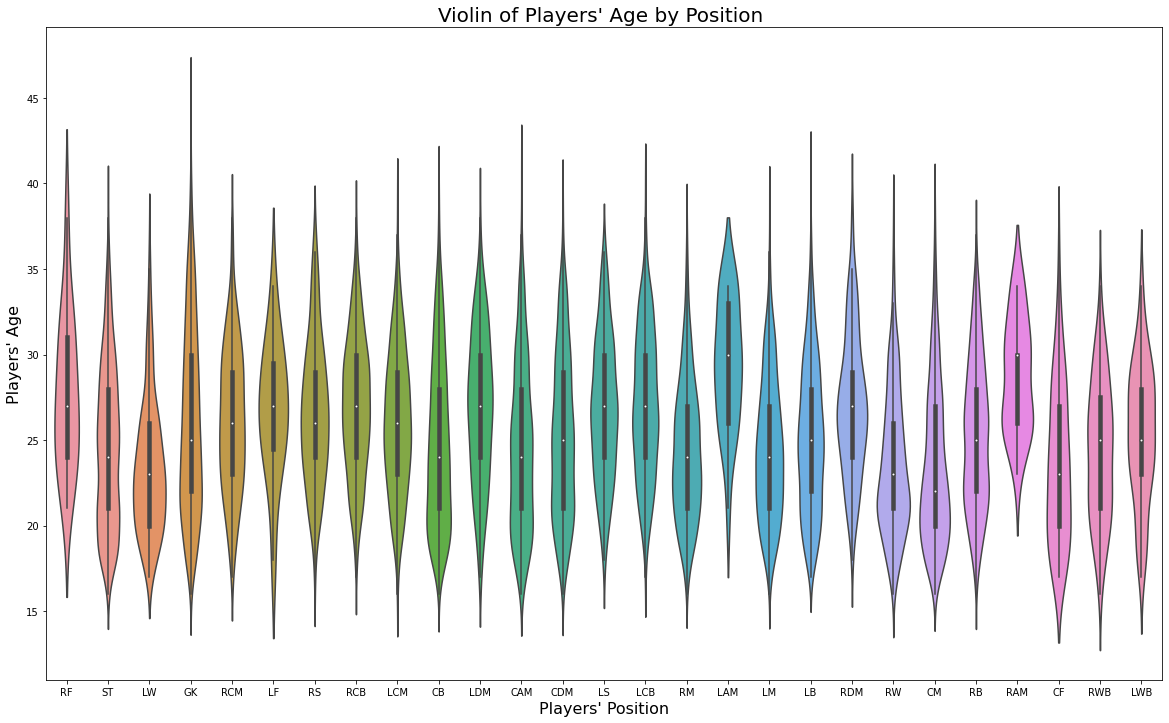

In [58]:
# Your Code Here
# Create a violin plot
plt.figure(figsize=(20, 12))
sns.violinplot(x = df3['Position'],
            y = df3['Age'])
plt.xlabel('Players\' Position',fontsize=16)
plt.ylabel('Players\' Age',fontsize=16)
plt.title('Violin of Players\' Age by Position ',fontsize=20 )

### 1.5
Creat a **stacked bar plot** for proportions of international reputation vs. players' ages (similar to the plot on page 97 of lecture 1 slide). **Ensure the axes and bars are labeled properly**

Note that international reputation takes value from [1,2,3,4,5]. Get rid of players whose international reputation is nan. 

Ages should be treated as intervals with width 5, i.e. the x-axis labels should be: 16 to 20, 21 to 25, 26 to 30,..., 41 to 45 

<Figure size 1152x864 with 0 Axes>

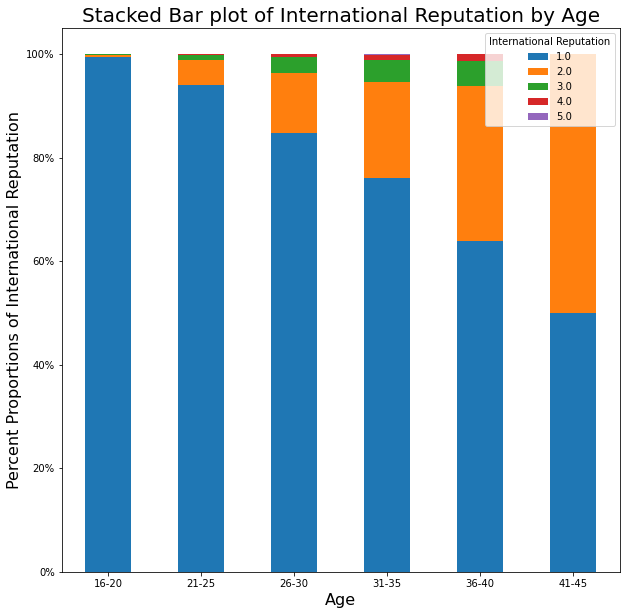

In [39]:
# Your Code Here
pd.options.mode.chained_assignment = None  ## Neglect the SettingWithCopyWarning
df4 = df.dropna(subset=['International Reputation'])## Get rid of nan values
df4['International Reputation'].unique()## Check if the nan vlaues has been all removed
import matplotlib.ticker as mtick

df4["Age"] 
df4["Age"] = pd.cut(x=df['Age'], bins=[16,21,26,31,36,41,46], labels=["16-20","21-25","26-30","31-35","36-40","41-45"]) ## Assign the age Group

plt.figure(figsize=(16,12))
ax= pd.crosstab(df4['Age'], df4['International Reputation']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(10,10),stacked=True, rot=0)
plt.legend(title='International Reputation',loc = "upper right")
plt.xlabel('Age',fontsize=16)
plt.ylabel('Percent Proportions of International Reputation',fontsize=16)
plt.title('Stacked Bar plot of International Reputation by Age',fontsize=20 )
ax_1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100, decimals=None, symbol='%', is_latex=False))
plt.show()



## Task 2: Data Preprocessing and Supervised Learning

Use the dataset_credit.csv for this task. The target variable is 'class'.

### 2.1

Load the data and understand the data distributions - pick a few features and plot their distributions.


In [63]:
# YOUR CODE HERE
df = pd.read_csv("dataset_credit.csv")
df.head()


,duration,credit_amount,savings_status,employment,property_magnitude,age,own_telephone,class
0,6,1169.0,'no known savings','>=7','real estate',67,NaN,good
1,48,5951.0,'<100','1<=X<4','real estate',22,NaN,bad
2,12,2096.0,'<100','4<=X<7','real estate',49,NaN,good
3,42,7882.0,'<100','4<=X<7','life insurance',45,none,good
4,24,4870.0,'<100','1<=X<4','no known property',53,NaN,bad


Text(0.5, 1.0, 'Histogram of Credit Class over Age')

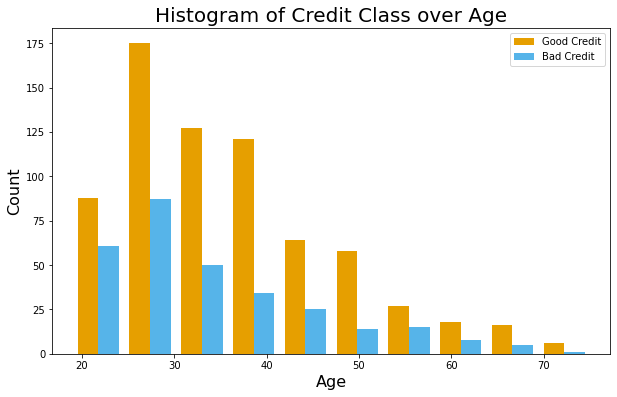

In [5]:
df_good = df[df['class'] == 'good']
df_bad = df[df['class'] == 'bad']

colors = ['#E69F00', '#56B4E9']
names = ['Good Credit', 'Bad Credit']
plt.figure(figsize=(10, 6))
plt.hist([df_good["age"], df_bad["age"]], color = colors, label=names)
plt.legend()
plt.xlabel('Age',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.title('Histogram of Credit Class over Age',fontsize=20 )

Text(0.5, 1.0, 'Violinplot of Credit amount by credit class')

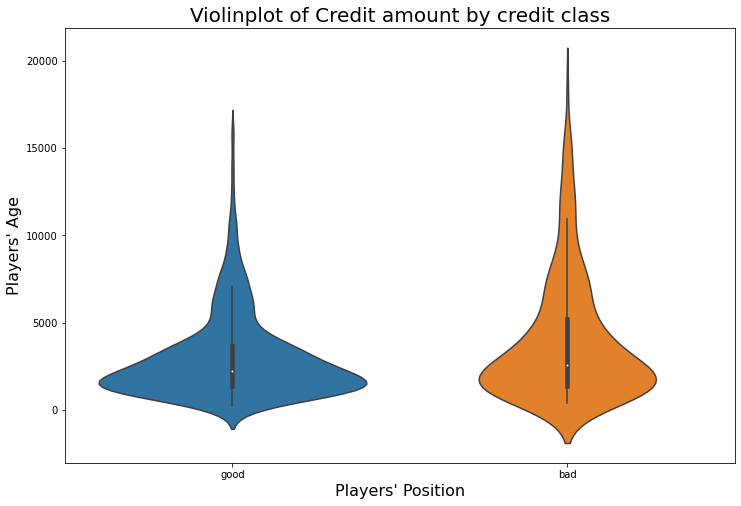

In [6]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.violinplot(x = df['class'],
            y = df['credit_amount'])
plt.xlabel('Players\' Position',fontsize=16)
plt.ylabel('Players\' Age',fontsize=16)
plt.title('Violinplot of Credit amount by credit class',fontsize=20 )

### 2.2

**Preprocessing** - does any feature need pre-processing? Would you do any scaling to numerical features? Are there any categorical features? How would you handle the categorical features? Are there any features that has missing values? What % of values are missing in each of the features? Based on this percentages, would you consider dropping any features? How about adding a missing indicator? Would you consider adding a missing indicator column?

In [7]:
df.head()

##Yes the data needs preprocessing, we can see there are 3 numerical features(duration, credit_amount, age)
##and 5 categorical features. Below are overview of the numerical and categorical features.

,duration,credit_amount,savings_status,employment,property_magnitude,age,own_telephone,class
0,6,1169.0,'no known savings','>=7','real estate',67,NaN,good
1,48,5951.0,'<100','1<=X<4','real estate',22,NaN,bad
2,12,2096.0,'<100','4<=X<7','real estate',49,NaN,good
3,42,7882.0,'<100','4<=X<7','life insurance',45,none,good
4,24,4870.0,'<100','1<=X<4','no known property',53,NaN,bad


<AxesSubplot:>

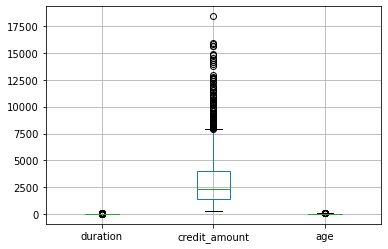

In [8]:
df.boxplot()
## From the boxplot, we can see that we need to do scaling to the numerical features since the distribution of the features
## are pretty varying in the scale.

In [9]:
from sklearn.preprocessing import StandardScaler
df_numerical = df[["duration","credit_amount","age"]]
ss = StandardScaler()
df2 = ss.fit_transform(df_numerical)


In [10]:
df["savings_status"].value_counts()

'<100'                603
'no known savings'    183
'100<=X<500'          103
'500<=X<1000'          63
'>=1000'               48
Name: savings_status, dtype: int64

In [11]:
df["employment"].value_counts()

'1<=X<4'      339
'>=7'         253
'4<=X<7'      174
'<1'          172
unemployed     62
Name: employment, dtype: int64

In [12]:
df["property_magnitude"].value_counts()

car                    332
'real estate'          282
'life insurance'       232
'no known property'    154
Name: property_magnitude, dtype: int64

In [13]:
df["own_telephone"].value_counts()

none    140
yes     101
Name: own_telephone, dtype: int64

In [14]:
df["class"].value_counts()

good    700
bad     300
Name: class, dtype: int64

From the overview of the categorical features, I was going to use ordinal encoding for savings_status, employment, own_telephone(will be dropped later due to a large percentage of missing values). For the property_magnitude feature, I decided to use one-hot encoding since the ordinal order of those different categories won't make sense if I use ordinal encoding. I will also encoding our the target feature, class, as a dummy variable(0 for bad and 1 for good).(I will process the categorical data after getting rid of the missing values first)

In [64]:
lst = []
n = df["duration"].count()#total sample size
lst.append(df["duration"].isna().sum().sum()/n)# Percent of missing values by percentage
lst.append(df["credit_amount"].isna().sum().sum()/n)
lst.append(df["savings_status"].isna().sum().sum()/n)
lst.append(df["employment"].isna().sum().sum()/n)
lst.append(df["property_magnitude"].isna().sum().sum()/n)
lst.append(df["age"].isna().sum().sum()/n)
lst.append(df["own_telephone"].isna().sum().sum()/n)
lst.append(df["class"].isna().sum().sum()/n)
lst
## we can see that there are 74(7.4%) missing values for credit amount and 759(75.9%) for own_telephone category.
## Therefore, I might consider dropping the own_telephone feature for the following classification task while adding a missing
## indicator for credit amount feature since some of the missing values might give me some insightful ideas on their class.
## (e.g. if someone's credit amount is missing, he/she might have a bad credit class)

[0.0, 0.074, 0.0, 0.0, 0.0, 0.0, 0.759, 0.0]

In [106]:
df = pd.read_csv("dataset_credit.csv")
df['credit_amount_missing'] = df["credit_amount"].isnull().astype(int)
df = df.drop('own_telephone', 1)
df['credit_amount'].fillna(df['credit_amount'].median(), inplace=True)##Replace NA of credit amount with median
df
## I dropped the own_telephone column and add a missing indicator for the credit_amount column

,duration,credit_amount,savings_status,employment,property_magnitude,age,class,credit_amount_missing
0,6,1169.0,'no known savings','>=7','real estate',67,good,0
1,48,5951.0,'<100','1<=X<4','real estate',22,bad,0
2,12,2096.0,'<100','4<=X<7','real estate',49,good,0
3,42,7882.0,'<100','4<=X<7','life insurance',45,good,0
4,24,4870.0,'<100','1<=X<4','no known property',53,bad,0
...,...,...,...,...,...,...,...,...
995,12,1736.0,'<100','4<=X<7','real estate',31,good,0
996,30,3857.0,'<100','1<=X<4','life insurance',40,good,0
997,12,804.0,'<100','>=7',car,38,good,0
998,45,2325.5,'<100','1<=X<4','no known property',23,bad,1


In [107]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

num_features = ["duration","credit_amount","age"]
ohe_features = ["property_magnitude","savings_status","employment"]

mixed_df = df[num_features+ohe_features]
enc = OrdinalEncoder(categories = [["bad", "good"]])
df["class"] = enc.fit_transform(df["class"].to_numpy().reshape(-1,1))
target = df["class"] ## convert target value to 


preprocess = make_column_transformer((StandardScaler(), num_features),
                                    (OneHotEncoder(handle_unknown = "ignore"), ohe_features),
                                     remainder = "passthrough" 
                                    )
mixed_df = preprocess.fit_transform(mixed_df) ## Preprocess the dataset


### 2.3

**Data splitting** - Create development & test datasets.

In [84]:
# YOUR CODE HERE
X = df.loc[ : , df.columns != 'class']
y = df["class"]
from sklearn.model_selection import train_test_split
X_dev,X_test,y_dev,y_test = train_test_split(X,y,stratify = y)

dev_good_data = X_dev[y_dev == 1.0]
dev_bad_data = X_dev[y_dev == 0.0]
test_good_data = X_test[y_test == 1.0]
test_bad_data = X_test[y_test == 0.0]
dev_good_data

,duration,credit_amount,savings_status,employment,property_magnitude,age,credit_amount_missing
593,24,2718.0,'<100','1<=X<4','life insurance',20,0
900,16,2625.0,'<100','>=7','life insurance',43,0
835,12,1082.0,'<100','1<=X<4',car,48,0
194,45,2325.5,'100<=X<500','1<=X<4','life insurance',21,1
711,6,1198.0,'<100','>=7','no known property',35,0
...,...,...,...,...,...,...,...
647,12,1386.0,'500<=X<1000','1<=X<4','life insurance',26,0
931,9,1670.0,'<100','<1',car,22,0
203,12,902.0,'<100','4<=X<7','life insurance',21,0
424,12,2762.0,'no known savings','>=7','life insurance',25,0


Give a reason on why did you use the particular splitting strategy.

Answer: I used stratified split based on the distribution of our target variable. Since the original ratio of bad and good class is 3:7, which is highly imbalanced, stratified splitting can ensure the ratio of classes in the development and test datasets to be equal to that of the original data set. 

### 2.4

**Model selection** - Lets use k-nearest neighbors to train a model. Pick 2 out of 4 model selection strategies discussed in class to compare the optimal k chosen from both the methods. Also compare the results from grid search v.s. random search for finding the optimal k.

In [203]:
# Grid search with three-way 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
X = mixed_df
y = target
X_dev,X_test,y_dev,y_test = train_test_split(X,y, random_state = 2021)
X_train,X_val,y_train,y_val = train_test_split(X_dev, y_dev, random_state = 2021)
val_scores = []
neighbors = np.arange(1,20,1)
for idx in neighbors:
    knn = KNeighborsClassifier(n_neighbors = idx)
    knn.fit(X_train,y_train)
    val_scores.append(knn.score(X_val,y_val))

print(f"Best validation score: {np.max(val_scores):.3f}")
best_n_neighbors = neighbors[np.argmax(val_scores)]
print("Best number of neighbors(Optimal k):", best_n_neighbors)
knn.fit(X_dev,y_dev)## fit to the development data set
print(f"Test Performance:{knn.score(X_test,y_test):.3f}")## Test Performance

Best validation score: 0.750
Best number of neighbors(Optimal k): 19
Test Performance:0.696


In [204]:
# Grid search with Stratified CV(k=5)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
X = mixed_df
y = target
X_dev,X_test,y_dev,y_test = train_test_split(X,y, random_state = 2021)
sfold = StratifiedKFold(n_splits = 5, shuffle = False)
sfold_val_scores = []
neighbors = np.arange(1,20,1)
for idx in neighbors:
    knn = KNeighborsClassifier(n_neighbors = idx)
    scores = cross_val_score(knn,X_dev,y_dev,cv = sfold)
    sfold_val_scores.append(np.mean(scores))

print(f"Best cross-validation score: {np.max(sfold_val_scores):.3f}")
best_n_neighbors = neighbors[np.argmax(sfold_val_scores)]
print("Best number of neighbors(Optimal k):", best_n_neighbors)
knn.fit(X_dev,y_dev)
print(f"Test Performance:{knn.score(X_test,y_test):.3f}")

Best cross-validation score: 0.715
Best number of neighbors(Optimal k): 19
Test Performance:0.696


In [221]:
# Random search with three-way folds

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,RandomizedSearchCV
from random import seed
from random import randint

X = mixed_df
y = target
X_dev,X_test,y_dev,y_test = train_test_split(X,y, random_state = 2021)
X_train,X_val,y_train,y_val = train_test_split(X_dev, y_dev, random_state = 2021)
val_scores = []
seed(2021)
for i in np.arange(1,20,1):
    idx = randint(1,50)## randomly search
    knn = KNeighborsClassifier(n_neighbors = idx)
    knn.fit(X_train,y_train)
    val_scores.append(knn.score(X_val,y_val))

print(f"Best validation score: {np.max(val_scores):.3f}")
best_n_neighbors = neighbors[np.argmax(val_scores)]
print("Best number of neighbors(Optimal k):", best_n_neighbors)
knn.fit(X_dev,y_dev)## fit to the development data set
print(f"Test Performance:{knn.score(X_test,y_test):.3f}")## Test Performance

Best validation score: 0.761
Best number of neighbors(Optimal k): 3
Test Performance:0.608


In [219]:
# Random search with stratified K-Fold CV(k=5)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

X = mixed_df
y = target
X_dev,X_test,y_dev,y_test = train_test_split(X,y, random_state = 2021)
sfold = StratifiedKFold(n_splits = 5, shuffle = False)
sfold_val_scores = []
neighbors = np.arange(1,20,1)
for i in np.arange(1,20,1):
    idx = randint(1,50)## randomly search
    knn = KNeighborsClassifier(n_neighbors = idx)
    scores = cross_val_score(knn,X_dev,y_dev,cv = sfold)
    sfold_val_scores.append(np.mean(scores))

print(f"Best cross-validation score: {np.max(sfold_val_scores):.3f}")
best_n_neighbors = neighbors[np.argmax(sfold_val_scores)]
print("Best number of neighbors(Optimal k):", best_n_neighbors)
knn.fit(X_dev,y_dev)
print(f"Test Performance:{knn.score(X_test,y_test):.3f}")

Best cross-validation score: 0.717
Best number of neighbors(Optimal k): 6
Test Performance:0.712


### 2.5

Compare the performance of 4 models (2 model selection strategies & 2 hyperparameter search strategies) on the test set. Which combination performs the best? Any reasons why this combination gives the best performance?


I have computed the test performance in the previous question along while choosing the optimal k and it seems that the test performance is best for the randomized search with stratified k-fold CV. 

This is very likely because grid search has a chance to missing the very important area of search with high density distribution. Therefore, sometimes random search may have a better performance than grid search. However, the better performance is not garanteed. We can see from the above test performance that random search had a way worse test performance than the grid search when using three-way folds, which is also resulted from the randomness. 

Also, we can see stratified K-fold CV does better than 3-way fold since it does a stratified cross validation on the development data set while the 3-way fold method simply choose the model that has a highest validation test performance(which can be a very minor case and overfitted to the validation data set.)